In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [4]:
data = pd.read_csv("../../3_Annotation/antismash_results/bgc_antismash_class_counts.csv").set_index("Unnamed: 0")
df = data.copy()

data.insert(0, "New", np.nan)
data = data.reset_index()
data.head()


,Unnamed: 0,New,GCA_002831645.1,GCA_001971785.1,GCA_002951395.1,GCA_903969135.1,GCA_009664855.1,GCA_001693415.1,GCA_008692195.1,GCA_004341805.1,GCA_003688495.1,GCA_000764795.1,GCA_900186425.1,GCA_000422725.1,GCA_000687935.1,GCA_012931685.1,GCA_002217285.1,GCA_014220885.1,GCA_900141955.1,GCA_002217435.1,GCA_002954645.1,GCA_001404985.1,GCA_003054025.1,GCA_003201775.1,GCA_001439215.1,GCA_007993795.1,GCA_006491645.1,GCA_014305215.1,GCA_004328055.1,GCA_000971735.2,GCA_004762155.1,GCA_000518525.1,GCA_004122105.1,GCA_002482945.1,GCA_000829375.1,GCA_004016525.1,GCA_000422365.1,GCA_014219395.1,GCA_003860585.1,GCA_001686925.1,GCA_003057865.1,GCA_002899825.2,GCA_008017345.1,GCA_900610305.1,GCA_009993865.1,GCA_002379725.1,GCA_900111025.1,GCA_000744105.1,GCA_900115115.1,GCA_900130035.1,GCA_004349155.1,GCA_002422665.1,GCA_900141785.1,GCA_002217315.1,GCA_002727005.1,GCA_002375245.1,GCA_000735135.1,GCA_013372885.1,GCA_004363695.1,GCA_002862805.1,GCA_900106075.1,GCA_000520955.1,GCA_003232155.1,GCA_001544435.1,GCA_900182675.1,GCA_900299475.1,GCA_012273615.1,GCA_002256385.1,GCA_002022045.1,GCA_006088815.1,GCA_002999135.1,GCA_002302595.1,GCA_003344925.1,GCA_000224085.1,GCA_007990835.1,GCA_011612125.1,GCA_013001965.1,GCA_900610255.1,GCA_000971785.2,GCA_900107365.1,GCA_003970335.1,GCA_011058315.1,GCA_003070725.1,GCA_013394595.1,GCA_004362665.1,GCA_900141855.1,GCA_002835665.1,GCA_900538225.1,GCA_002171295.2,GCA_002023335.1,GCA_000626715.1,GCA_004959765.1,GCA_000423005.1,GCA_013002225.1,GCA_900104785.1,GCA_002439165.1,GCA_001684955.1,GCA_002909255.1,GCA_014220525.1,GCA_009994385.1,GCA_002711455.1,GCA_002862705.1,GCA_004369705.1,GCA_002700405.1,GCA_002728045.1,GCA_000379185.1,GCA_014220725.1,GCA_002728855.1,GCA_003971235.1,GCA_010645065.1,GCA_002471825.1,GCA_003318185.1,GCA_008370685.1,GCA_009725985.1,GCA_001510875.1,GCA_000769815.1,GCA_900142635.1,GCA_009495755.1,GCA_001439665.1,GCA_002721175.1,GCA_004293805.1,GCA_900101925.1,GCA_003581615.1,GCA_003634615.1,GCA_900446845.1,GCA_002693085.1,GCA_013042425.1,GCA_001761325.1,GCA_013294075.1,GCA_013043005.1,GCA_011305415.1,GCA_002429865.1,GCA_900453765.1,GCA_013214815.1,GCA_014220675.1,GCA_900447295.1,GCA_002713705.1,GCA_900447195.1,GCA_002691265.1,GCA_000982575.1,GCA_000757385.1,GCA_900239505.1,GCA_002453015.1,GCA_000799195.1,GCA_003487925.1,GCA_000495995.1,GCA_009938095.1,GCA_002713495.1,GCA_003968825.1,GCA_900108525.1,GCA_009827855.1,GCA_010500845.1,GCA_002453895.1,GCA_000282055.1,GCA_000799325.1,GCA_002364245.1,GCA_002831685.1,GCA_900186815.1,GCA_014243345.1,GCA_007097385.1,GCA_009360735.1,GCA_000799235.1,GCA_013373485.1,GCA_002312885.1,GCA_003970375.1,GCA_009498295.1,GCA_009659705.1,GCA_010906935.1,GCA_001686935.1,GCA_002746415.1,GCA_008501705.1,GCA_008017825.1,GCA_003254565.1,GCA_003525065.1,GCA_900108395.1,GCA_004349135.1,GCA_002366675.1,GCA_002072105.2,GCA_002401215.1,GCA_003315315.1,GCA_014220605.1,GCA_014050215.1,GCA_003014895.1,GCA_007474535.1,GCA_008124555.1,GCA_009753805.1,GCA_014219825.1,GCA_902705525.1,GCA_002899875.1,GCA_002292245.1,GCA_003058265.1,GCA_003852805.1,GCA_002401385.1,GCA_007474545.1,GCA_009797885.1,GCA_900108365.1,GCA_900239305.1,GCA_002315415.1,GCA_002375695.1,GCA_003410315.1,GCA_008017835.1,GCA_009886545.1,GCA_002530675.1,GCA_900111495.1,GCA_002433745.1,GCA_014220055.1,GCA_003055625.1,GCA_000243275.1,GCA_003293825.1,GCA_002785365.1,GCA_000496015.1,GCA_002364215.1,GCA_900239455.1,GCA_900113975.1,GCA_007997235.1,GCA_000060345.1,GCA_004684835.1,GCA_002723075.1,GCA_014239615.1,GCA_001889005.1,GCA_002120225.1,GCA_002483315.1,GCA_000153165.2,GCA_002025665.1,GCA_002631855.1,GCA_007050985.1,GCA_900299525.1,GCA_002023465.1,GCA_000744275.1,GCA_009994285.1,GCA_002708445.1,GCA_009993745.1,GCA_002311535.1,GCA_003208535.1,GCA_002354835.1,GCA_014218945.1,GCA_900109345.1,GCA_002484335.1,GCA_003001855.1,GCA_011392075.1,GCA_003097655.1,GCA_002722255.1,GCA_000382425.1,GCA_003298875.1,GCA_002514735.1,GCA_008629655.1,GCA_002399805.1,GCA_007997385.1,GCA_006778065.1,GCA_014219625.1,GCA_014220005.1,

In [5]:
df["Total"] = df.sum(axis=1)
df = df[["Total"]]
df = df.sort_values(by="Total", ascending=False)
df_major = df.copy().reset_index()
df_major["New"] = np.nan
df_major.head()


,Unnamed: 0,Total,New
0,terpene,3128,NaN
1,"arylpolyene,resorcinol",737,NaN
2,T3PKS,686,NaN
3,siderophore,664,NaN
4,arylpolyene,611,NaN


In [6]:
Terpene=["terpene"]

arylpolyene_resorcinol = ["arylpolyene,resorcinol", "resorcinol,arylpolyene"]

T3PKS = [ "t3pks", "3PKS", "T3PKS", "T3PKS,betalactone", "T3PKS,arylpolyene", 
		   "arylpolyene,T3PKS", "arylpolyene,resorcinol,T3PKS", 
		   "lanthipeptide,T3PKS,bacteriocin",
		   "betalactone,T3PKS", "terpene,T3PKS", "T3PKS,terpene", 
		   "T3PKS,arylpolyene,resorcinol", "T3PKS,resorcinol"]
# siderophore
Siderophore = ["siderophore"]

arylpolyene = ["arylpolyene"]

betalactone = ["betalactone"]

NRPS = ["NRPS-like", "NRPS"]
# NRPS_other: nrps and other type, except pks
NRPS_other = ["thioamide-NRP", "NRPS,siderophore", "NRPS,lanthipeptide", 
				"terpene,NRPS-like,betalactone", "NRPS,indole", 
				"ladderane,NRPS","NRPS-like,bacteriocin","NRPS,proteusin,LAP"
				"NRPS-like,lanthipeptide", "NRPS,betalactone", 
				"NRPS-like,siderophore","NRPS,ladderane","NRPS-like,terpene", 
				"NRPS,LAP,proteusin", "arylpolyene,resorcinol,NRPS",
				"NRPS-like,betalactone", "NRPS,terpene", "siderophore,NRPS", 
				"terpene,NRPS-like", "NRPS-like,NRPS,siderophore",
				"NRPS-like,lanthipeptide", "NRPS,proteusin,LAP"
				]
				
# NRPS_PKS_hybrid: nrps with pks
NRPS_PKS_hybrid =["T1PKS,NRPS", "NRPS,T1PKS", "NRPS,transAT-PKS", 
				  "PKS-like,transAT-PKS,NRPS", "NRPS-like,T3PKS", 
				  "NRPS-like,T1PKS","NRPS,T1PKS,lanthipeptide",
				  "T3PKS,NRPS","NRPS,T1PKS,T3PKS", "T1PKS,NRPS-like", 
				  "transAT-PKS,transAT-PKS-like,NRPS-like,PKS-like,T3PKS", 
				  "T3PKS,NRPS,T1PKS", "T1PKS,NRPS", "NRPS,T1PKS,betalactone", 
				  "NRPS,bacteriocin","T3PKS,hglE-KS,siderophore,NRPS,T1PKS", 
				  "hglE-KS,T1PKS,NRPS,betalactone","transAT-PKS,NRPS",
				  "transAT-PKS-like,transAT-PKS,PKS-like,NRPS,T1PKS", 
				  "betalactone,NRPS-like", "transAT-PKS,NRPS-like", 
				  "NRPS,T1PKS,bacteriocin","NRPS-like,hglE-KS,T1PKS",
				  "NRPS,T1PKS,siderophore,hglE-KS,T3PKS", "T3PKS,NRPS-like",
				  "NRPS,T3PKS","NRPS,T1PKS,T3PKS","thioamide-NRP",
				  "transAT-PKS-like,transAT-PKS,T3PKS,PKS-like,NRPS-like",
				  "NRPS,hglE-KS,T1PKS", "transAT-PKS,NRPS,PKS-like",
				  "transAT-PKS,transAT-PKS-like,NRPS-like,PKS-like,T3PKS",
				  "T1PKS,hglE-KS,NRPS,siderophore", "transAT-PKS,NRPS,PKS-like",
				  "NRPS,T1PKS,siderophore",
				  ]
# transAT_PKS: only transAT_PKS (may have other types of PKS)
transAT_PKS = ["transAT-PKS","transatpks","transAT-PKS,PKS-like",
			   "transAT-PKS,PKS-like", 
			  "transAT-PKS5", "transAT-PKS-like", 
			  "transAT-PKS-like,transAT-PKS,PKS-like", 
			  "transAT-PKS,PKS-like,transAT-PKS-like",
			  "transAT-PKS,transAT-PKS-like", "transAT-PKS,bacteriocin",
			  "transAT-PKS-like,transAT-PKS,PKS-like,ladderane",
			  "transAT-PKS-like,transAT-PKS",
			  "transAT-PKS,PKS-like,ladderane"     
			  ]
# PKSI
PKSI = ["t1pks", "T1PKS"]
# PKSII
PKSII = ["t2pks"]
# PKSIII

#PKS_other: combination of pks with other pks or with other types (except nrps)
PKS_other = ["otherks", "hglks", "PKS", "PKS-like", "hglE-KS", "hglE-KS,T1PKS",
			   "T1PKS,hglE-KS", "hglE-KS,T1PKS,terpene", 
			   "ladderane,transAT-PKS,PKS-like,transAT-PKS-like", "T1PKS,PUFA",
			   "ladderane,transAT-PKS,PKS-like","T1PKS,PUFA,hglE-KS"
			   "transAT-PKS,PKS-like,ladderane", "T1PKS,hglE-KS,terpene",
			   "lanthipeptide,T1PKS,hglE-KS", "hglE-KS,T1PKS,lanthipeptide",
			   "terpene,hglE-KS,PUFA,T1PKS", "terpene,T1PKS,hglE-KS",
			   "terpene,hglE-KS,T1PKS", "hglE-KS,PUFA,T1PKS", 
			   "PUFA,T1PKS,hglE-KS","hglE-KS,terpene,T1PKS","PUFA,T1PKS",
			   "lanthipeptide,hglE-KS,T1PKS", "hglE-KS,T1PKS,PUFA", 
			   ]
# Saccharides
Saccharides=["amglyccycl", "oligosaccharide", "cf_saccharide", "saccharide"]


# only RiPPs
RiPPs= ["lantipeptide", "thiopeptide", "bacteriocin", "linaridin", "proteusin", 
		   "cyanobactin", "glycocin", "LAP", "lassopeptide", "sactipeptide", 
		   "bottromycin", "head_to_tail", "microcin", "microviridin", 
		   "lanthipeptide", "lipolanthine", "RaS-RiPP", "fungal-RiPP",
		   "bacteriocin,lanthipeptide", "lanthipeptide,bacteriocin",
		   "thiopeptide,LAP", "LAP,proteusin", "proteusin,LAP","RaS-RiPP",
		   "proteusin,LAP,bacteriocin","LAP,proteusin,bacteriocin",
		   "TfuA-related"
		   ]
# Others: diversified combinations and bgcs that don't fit previous classes
Others = ["acyl_amino_acids",  "aminocoumarin", "ectoine", 
			"butyrolactone", "nucleoside", "melanin", "phosphoglycolipid", 
			"phenazine", "phosphonate", "other", "cf_putative", "resorcinol", 
			"indole", "ladderane", "PUFA", "furan", "hserlactone", "fused", 
			"cf_fatty_acid",  "blactam", "fatty_acid" "PpyS-KS", 
			"CDPS",  "PBD", "tropodithietic-acid", "NAGGN", 
			"halogenated",  "terpene,bacteriocin","arylpolyene,bacteriocin",
			"arylpolyene,resorcinol", "resorcinol,arylpolyene", 
			"siderophore,terpene","terpene,ladderane","bacteriocin,acyl_amino_acids",
			"lanthipeptide,terpene", "arylpolyene,lanthipeptide,resorcinol",
			"acyl_amino_acids,bacteriocin", "ladderane,terpene", 
			"arylpolyene,resorcinol","arylpolyene,resorcinol,bacteriocin", 
			"lanthipeptide,siderophore","bacteriocin,arylpolyene,resorcinol", 
			"siderophore,bacteriocin", "terpene,lanthipeptide",
			"terpene,siderophore","terpene,arylpolyene,resorcinol",
			"terpene,betalactone", "bacteriocin,siderophore", 
			"terpene,bacteriocin,siderophore","terpene,arylpolyene"
			]

In [7]:
x=0
for x in (range(len(df_major))):
	a = df_major.iloc[x,0]
	#print(a)
	if a in NRPS:
		df_major.iloc[x,2] = "NRPS"
		#print(a +" is NRPS")
	elif a in NRPS_other:
		df_major.iloc[x,2] ="NRPS-other"
		#print(a +" is NRPS_other")
	elif a in NRPS_PKS_hybrid:
		df_major.iloc[x,2] = "NRPS-PKS_hybrid"
		#print(a +" is NRPS_hybrid")
	elif a in transAT_PKS:
		df_major.iloc[x,2] = "transAT-PSK"
		#print(a +" is transAT_PKS")    
	elif a in PKSI:
		df_major.iloc[x,2] ="PKSI"
		#print(a +" is PKSI")
	elif a in PKSII:
		df_major.iloc[x,2] ="PKSII"
		#print(a +" is PKSI")
	elif a in T3PKS:
		df_major.iloc[x,2] ="T3PKS"
		#print(a +" is PKSIII")
	elif a in PKS_other:
		df_major.iloc[x,2] ="PKS_other"
		#print(a +" is PKS_other")
	elif a in Saccharides:
		df_major.iloc[x,2] ="Saccharides"
		#print(a +" is Saccharides")        
	elif a in Terpene:
		df_major.iloc[x,2]="Terpene"
		#print(a +" is terpene")
	elif a in Siderophore:
		df_major.iloc[x,2] ="Siderophore"
		#print(a +" is siderophore")            
	elif a in RiPPs:
		df_major.iloc[x,2] ="RiPPs"
	elif a in arylpolyene_resorcinol:
		df_major.iloc[x,2] ="Arylpolyene-resorcinol"
	elif a in arylpolyene:
		df_major.iloc[x,2] ="Arylpolyene"
	elif a in betalactone:
		df_major.iloc[x,2] ="Betalactone"
	elif a in Others:
		df_major.iloc[x,2] ="Others"
	else:
		df_major.iloc[x,2] = "Unclassified"
		print(str(a) + " is unclassified")
	x +=1
df_major.head()

,Unnamed: 0,Total,New
0,terpene,3128,Terpene
1,"arylpolyene,resorcinol",737,Arylpolyene-resorcinol
2,T3PKS,686,T3PKS
3,siderophore,664,Siderophore
4,arylpolyene,611,Arylpolyene


In [8]:
x=0
for x in (range(len(data))):
	a = data.iloc[x,0]
	#print(a)
	if a in NRPS:
		data.iloc[x,1] = "NRPS"
		#print(a +" is NRPS")
	elif a in NRPS_other:
		data.iloc[x,1] ="NRPS-other"
		#print(a +" is NRPS_other")
	elif a in NRPS_PKS_hybrid:
		data.iloc[x,1] = "NRPS-PKS hybrid"
		#print(a +" is NRPS_hybrid")
	elif a in transAT_PKS:
		data.iloc[x,1] = "transAT-PSK"
		#print(a +" is transAT_PKS")    
	elif a in PKSI:
		data.iloc[x,1] ="PKSI"
		#print(a +" is PKSI")
	elif a in PKSII:
		data.iloc[x,1] ="PKSII"
		#print(a +" is PKSI")
	elif a in T3PKS:
		data.iloc[x,1] ="T3PKS"
		#print(a +" is PKSIII")
	elif a in PKS_other:
		data.iloc[x,1] ="PKS-other"
		#print(a +" is PKS_other")
	elif a in Saccharides:
		data.iloc[x,1] ="Saccharides"
		#print(a +" is Saccharides")        
	elif a in Terpene:
		data.iloc[x,1]="Terpene"
		#print(a +" is terpene")
	elif a in Siderophore:
		data.iloc[x,1] ="Siderophore"
		#print(a +" is siderophore")            
	elif a in RiPPs:
		data.iloc[x,1] ="RiPPs"
	elif a in arylpolyene_resorcinol:
		data.iloc[x,1] ="Arylpolyene-resorcinol"
	elif a in arylpolyene:
		data.iloc[x,1] ="Arylpolyene"
	elif a in betalactone:
		data.iloc[x,1] ="Betalactone"
	elif a in Others:
		data.iloc[x,1] ="Others"
	else:
		data.iloc[x,1] = "Unclassified"
		print(str(a) + " is unclassified")
	x +=1
data.head()

,Unnamed: 0,New,GCA_002831645.1,GCA_001971785.1,GCA_002951395.1,GCA_903969135.1,GCA_009664855.1,GCA_001693415.1,GCA_008692195.1,GCA_004341805.1,GCA_003688495.1,GCA_000764795.1,GCA_900186425.1,GCA_000422725.1,GCA_000687935.1,GCA_012931685.1,GCA_002217285.1,GCA_014220885.1,GCA_900141955.1,GCA_002217435.1,GCA_002954645.1,GCA_001404985.1,GCA_003054025.1,GCA_003201775.1,GCA_001439215.1,GCA_007993795.1,GCA_006491645.1,GCA_014305215.1,GCA_004328055.1,GCA_000971735.2,GCA_004762155.1,GCA_000518525.1,GCA_004122105.1,GCA_002482945.1,GCA_000829375.1,GCA_004016525.1,GCA_000422365.1,GCA_014219395.1,GCA_003860585.1,GCA_001686925.1,GCA_003057865.1,GCA_002899825.2,GCA_008017345.1,GCA_900610305.1,GCA_009993865.1,GCA_002379725.1,GCA_900111025.1,GCA_000744105.1,GCA_900115115.1,GCA_900130035.1,GCA_004349155.1,GCA_002422665.1,GCA_900141785.1,GCA_002217315.1,GCA_002727005.1,GCA_002375245.1,GCA_000735135.1,GCA_013372885.1,GCA_004363695.1,GCA_002862805.1,GCA_900106075.1,GCA_000520955.1,GCA_003232155.1,GCA_001544435.1,GCA_900182675.1,GCA_900299475.1,GCA_012273615.1,GCA_002256385.1,GCA_002022045.1,GCA_006088815.1,GCA_002999135.1,GCA_002302595.1,GCA_003344925.1,GCA_000224085.1,GCA_007990835.1,GCA_011612125.1,GCA_013001965.1,GCA_900610255.1,GCA_000971785.2,GCA_900107365.1,GCA_003970335.1,GCA_011058315.1,GCA_003070725.1,GCA_013394595.1,GCA_004362665.1,GCA_900141855.1,GCA_002835665.1,GCA_900538225.1,GCA_002171295.2,GCA_002023335.1,GCA_000626715.1,GCA_004959765.1,GCA_000423005.1,GCA_013002225.1,GCA_900104785.1,GCA_002439165.1,GCA_001684955.1,GCA_002909255.1,GCA_014220525.1,GCA_009994385.1,GCA_002711455.1,GCA_002862705.1,GCA_004369705.1,GCA_002700405.1,GCA_002728045.1,GCA_000379185.1,GCA_014220725.1,GCA_002728855.1,GCA_003971235.1,GCA_010645065.1,GCA_002471825.1,GCA_003318185.1,GCA_008370685.1,GCA_009725985.1,GCA_001510875.1,GCA_000769815.1,GCA_900142635.1,GCA_009495755.1,GCA_001439665.1,GCA_002721175.1,GCA_004293805.1,GCA_900101925.1,GCA_003581615.1,GCA_003634615.1,GCA_900446845.1,GCA_002693085.1,GCA_013042425.1,GCA_001761325.1,GCA_013294075.1,GCA_013043005.1,GCA_011305415.1,GCA_002429865.1,GCA_900453765.1,GCA_013214815.1,GCA_014220675.1,GCA_900447295.1,GCA_002713705.1,GCA_900447195.1,GCA_002691265.1,GCA_000982575.1,GCA_000757385.1,GCA_900239505.1,GCA_002453015.1,GCA_000799195.1,GCA_003487925.1,GCA_000495995.1,GCA_009938095.1,GCA_002713495.1,GCA_003968825.1,GCA_900108525.1,GCA_009827855.1,GCA_010500845.1,GCA_002453895.1,GCA_000282055.1,GCA_000799325.1,GCA_002364245.1,GCA_002831685.1,GCA_900186815.1,GCA_014243345.1,GCA_007097385.1,GCA_009360735.1,GCA_000799235.1,GCA_013373485.1,GCA_002312885.1,GCA_003970375.1,GCA_009498295.1,GCA_009659705.1,GCA_010906935.1,GCA_001686935.1,GCA_002746415.1,GCA_008501705.1,GCA_008017825.1,GCA_003254565.1,GCA_003525065.1,GCA_900108395.1,GCA_004349135.1,GCA_002366675.1,GCA_002072105.2,GCA_002401215.1,GCA_003315315.1,GCA_014220605.1,GCA_014050215.1,GCA_003014895.1,GCA_007474535.1,GCA_008124555.1,GCA_009753805.1,GCA_014219825.1,GCA_902705525.1,GCA_002899875.1,GCA_002292245.1,GCA_003058265.1,GCA_003852805.1,GCA_002401385.1,GCA_007474545.1,GCA_009797885.1,GCA_900108365.1,GCA_900239305.1,GCA_002315415.1,GCA_002375695.1,GCA_003410315.1,GCA_008017835.1,GCA_009886545.1,GCA_002530675.1,GCA_900111495.1,GCA_002433745.1,GCA_014220055.1,GCA_003055625.1,GCA_000243275.1,GCA_003293825.1,GCA_002785365.1,GCA_000496015.1,GCA_002364215.1,GCA_900239455.1,GCA_900113975.1,GCA_007997235.1,GCA_000060345.1,GCA_004684835.1,GCA_002723075.1,GCA_014239615.1,GCA_001889005.1,GCA_002120225.1,GCA_002483315.1,GCA_000153165.2,GCA_002025665.1,GCA_002631855.1,GCA_007050985.1,GCA_900299525.1,GCA_002023465.1,GCA_000744275.1,GCA_009994285.1,GCA_002708445.1,GCA_009993745.1,GCA_002311535.1,GCA_003208535.1,GCA_002354835.1,GCA_014218945.1,GCA_900109345.1,GCA_002484335.1,GCA_003001855.1,GCA_011392075.1,GCA_003097655.1,GCA_002722255.1,GCA_000382425.1,GCA_003298875.1,GCA_002514735.1,GCA_008629655.1,GCA_002399805.1,GCA_007997385.1,GCA_006778065.1,GCA_014219625.1,GCA_014220005.1,

In [9]:
data = data.drop(columns=["Unnamed: 0"])
data = data.groupby("New").sum()
data = data.T
data.head()

New,Arylpolyene,Arylpolyene-resorcinol,Betalactone,NRPS,NRPS-PKS hybrid,NRPS-other,Others,PKS-other,PKSI,RiPPs,Siderophore,T3PKS,Terpene,transAT-PSK
GCA_002831645.1,0,0,0,0,0,0,1,0,0,1,0,1,1,0
GCA_001971785.1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
GCA_002951395.1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
GCA_903969135.1,0,1,0,1,0,0,0,1,0,3,1,0,1,0
GCA_009664855.1,0,1,1,0,0,0,0,0,0,2,0,1,2,0


In [10]:
metadata = pd.read_csv("All_info.csv")
metadata = metadata[["Assembly accession", "Genus", "Family"]]
metadata.head()

,Assembly accession,Genus,Family
0,GCA_000016645.1,Flavobacterium,Flavobacteriaceae
1,GCA_000023285.1,Capnocytophaga,Flavobacteriaceae
2,GCA_000023465.1,Zunongwangia,Flavobacteriaceae
3,GCA_000023725.1,Kaistella,Weeksellaceae
4,GCA_000024125.1,Robiginitalea,Flavobacteriaceae


In [31]:
x =metadata.groupby("Genus").count().reset_index()
x[x["Genus"]=="SCGC-AAA160-P02"]

,Genus,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
126,SCGC-AAA160-P02,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,4,4,4,0,4,4,0,3,1,0,0,0,4,4,4,2,0,4,1,0,1,2,0,0,0,0,0,0,0,1,0,1,0,1,1,2,0,4,0,0,2,4,1,1,4,0,4,0,4,4,0,4,2,4,1,0,2,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,3,1,3,2,3,0,3,0,0,0,2,0,0,0,3,4,1,3,4,0,0,0,1,0,0,1,0,1,3,1,0,0,2,1,0,4,1,0,3,3,3,4,4,4,0,4,4,1,0,4,0,0,4,0,0,3,3,4,0,0,4,0,0,0,0,0,0,0,0,4,3,0,3,4,4


In [11]:
bgc = pd.merge(data, metadata, how="left", left_index=True, right_on="Assembly accession")
bgc.head()

,Arylpolyene,Arylpolyene-resorcinol,Betalactone,NRPS,NRPS-PKS hybrid,NRPS-other,Others,PKS-other,PKSI,RiPPs,Siderophore,T3PKS,Terpene,transAT-PSK,Assembly accession,Genus,Family
1080.0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,GCA_002831645.1,Olleya,Flavobacteriaceae
512.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,GCA_001971785.1,Seonamhaeicola,Flavobacteriaceae
1130.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,GCA_002951395.1,Elizabethkingia,Weeksellaceae
2679.0,0,1,0,1,0,0,0,1,0,3,1,0,1,0,GCA_903969135.1,Chryseobacterium,Weeksellaceae
1808.0,0,1,1,0,0,0,0,0,0,2,0,1,2,0,GCA_009664855.1,Flavobacterium,Flavobacteriaceae


In [12]:
bgcs_mean = bgc.groupby(['Genus']).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).mean()
bgcs_mean = bgcs_mean.reset_index().set_index("Genus")
bgcs_mean = bgcs_mean.fillna(0)
bgcs_mean = bgcs_mean.sort_values(by=["Family", "Genus"])
bgcs_mean = bgcs_mean.drop(columns="Family")
bgcs_mean = bgcs_mean.sort_index(axis=1, ascending=False)
bgcs_mean.head()

,transAT-PSK,Terpene,T3PKS,Siderophore,RiPPs,PKSI,PKS-other,Others,NRPS-other,NRPS-PKS hybrid,NRPS,Betalactone,Arylpolyene-resorcinol,Arylpolyene
Genus,,,,,,,,,,,,,,
Aequorivita,0.00000,1.023810,0.904762,0.000000,0.000000,0.0,0.000000,0.047619,0.000000,0.000000,0.000000,0.02381,0.857143,0.095238
Algibacter,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.111111,0.00000,0.000000,0.000000
Aquimarina,0.74359,2.000000,0.923077,0.846154,1.564103,0.0,0.076923,0.205128,0.076923,0.564103,1.769231,0.00000,0.512821,0.230769
Arenibacter,0.00000,2.681818,0.954545,0.000000,0.045455,0.0,0.000000,0.000000,0.000000,0.000000,0.272727,0.00000,0.681818,0.045455
BACL21,0.00000,1.071429,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


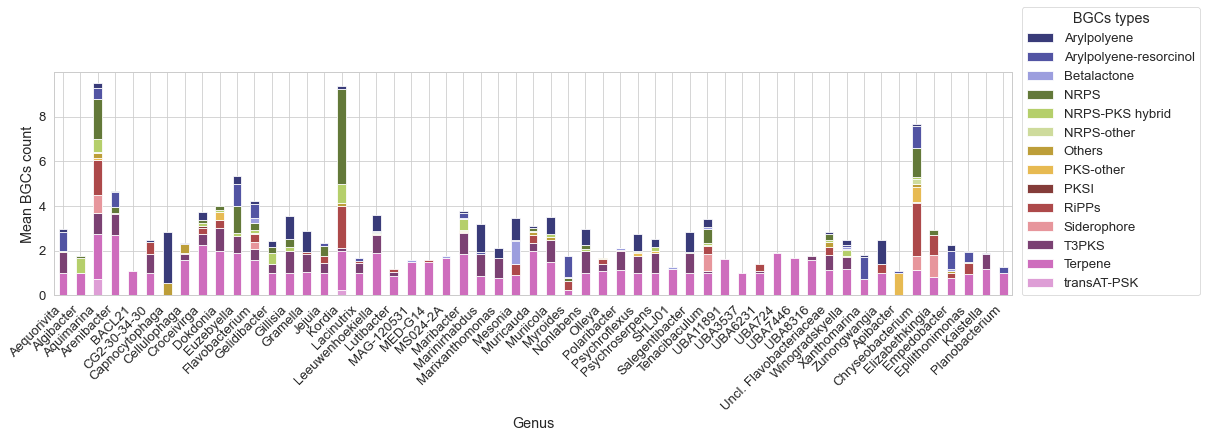

In [13]:
from matplotlib import cm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

cmap = cm.get_cmap('tab20b_r') # Colour map (there are many others)

ax = bgcs_mean.plot(kind="bar", stacked=True, cmap=cmap,
              figsize=(17,6))

plt.ylabel('Mean BGCs count')
plt.xticks(rotation=45, horizontalalignment='right')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(1.01,0),title="BGCs types")
#leg._legend_box.align = "left"


plt.tight_layout()
plt.show()

ax.figure.savefig("BGCs_types.svg", dpi=300)

# trans-AT PKS

In [14]:
metadata = pd.read_csv("All_info.csv")
metadata.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,High,5192,3948,1843,3127,244,76.040062,35.496918,60.227273,4.699538,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [15]:
bgc_info = pd.read_csv("../../3_Annotation/antismash_results/all_BGC_info.csv")
bgc_info = bgc_info.rename(columns={"Most_similar_known_ cluster":"Most_similar_known_cluster"})
bgc_known = bgc_info[bgc_info["Most_similar_classif"].notnull()]
bgc_known.head(2)

,Genome,Region_Type,antiSMASH_classif,new_classif,From,To,Size(bp),Most_similar_known_cluster,Most_similar_classif,Similarity,Correct_name
2,GCA_002831645.1,Region&nbsp3,terpene,terpene,2137564.0,2160010,22446.0,carotenoid,Terpene,28%,GCA_002831645_contig1.region003
5,GCA_001971785.1,Region&nbsp2,terpene,terpene,2834169.0,2855008,20839.0,carotenoid,Terpene,28%,GCA_001971785_contig1.region002


In [16]:
bgc = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgc = bgc.set_index("index").T
bgc["Nr_BGCs"] = bgc.sum(axis=1)
bgc.head()


index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs
GCA_002831645.1,0,0,0,1,0,1,0,1,0,1,0,4
GCA_001971785.1,0,0,0,0,0,0,0,1,0,1,0,2
GCA_002951395.1,0,0,0,0,0,0,0,0,1,1,0,2
GCA_903969135.1,1,0,0,1,0,0,1,3,1,1,0,8
GCA_009664855.1,0,0,0,2,0,1,0,2,0,2,0,7


In [17]:
bgc_known_metadata = pd.merge(bgc, metadata, how="left", left_index=True, right_on="Assembly accession")

bgc_known_metadata.head(2)

,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
1080.0,0,0,0,1,0,1,0,1,0,1,0,4,GCA_002831645.1,GCA_002831645.1_ASM283164v1_genomic,s__algicola (UID2846),99.67,0.33,0.0,98.02,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Olleya,Olleya sp002831645,1.0,1.0,4314320.0,4314320.0,0.0,1.0,4314320.0,1.0,4314320.0,1.0,4314320.0,1.0,4314320.0,4314320.0,4314320.0,1.0,100.0,0.32759,0.0,High,3835.0,2862.0,1368.0,2230.0,90.0,74.628422,35.671447,58.148631,2.346806,ASM283164v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,Unicycler v. 0.3.1,Unicycler v. 0.3.1,NaN,PRJNA420923,SAMN08125748,NaN,MIGS Cultured Bacterial/Archaeal sample from O...,NaN,NaN,NaN,NaN,2014,Keywords: GSC:MIxS;MIGS:5.0,2017-12-11T00:00:00Z,cryomics@gmail.com,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,marine biome,NaN,sea ice floe,NaN,sea ice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/002...,NaN,GCF_002831645.1,CP025117,NaN,Olleya sp. Bg11-27,NaN,Full,Complete,NaN,"USA: near Point Barrow, Alaska","near Point Barrow, Alaska",USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [18]:

df = bgc_known_metadata.groupby(['Genus']).filter(lambda x:x['Genus'].count()>=7).groupby(['Genus', "Family"]).mean()
df["%_transATPKS"]= df["transAT_PSK"]/df["Nr_BGCs"]*100
df = df.reset_index().set_index("Genus")
df = df.fillna(0)
df = df.sort_values(by=["Family", "Genus"])
df = df.drop(columns="Family")
df = df.reset_index()
df.head()

,Genus,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs,Completeness,Contamination,Strain_heterogeneity,Quality_score,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Contigs,Host taxid,Ncbi taxon ID,Plasmids,Refseq cds,Species taxid,%_transATPKS
0,Aequorivita,0.000000,0.000000,0.000000,1.023810,0.0,0.904762,0.000000,0.000000,0.000000,1.023810,0.00000,2.952381,95.061429,0.841905,8.900238,90.851905,77.261905,185.571429,3.200450e+06,3.185949e+06,0.490238,14.095238,3.760242e+05,29.500000,3.460910e+05,43.214286,2.259482e+05,95.928571,2.152300e+05,5.943196e+05,5.507783e+05,13.523810,75.986500,0.382638,0.026743,2958.714286,2238.047619,1139.166667,1827.642857,53.309524,75.987128,38.569948,61.822365,1.796647,74.578947,0.0,1.604701e+06,0.0,2994.6000,1.603573e+06,0.000000
1,Algibacter,0.111111,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.777778,98.622222,1.021111,0.694444,93.516667,31.666667,32.555556,4.651915e+06,4.651624e+06,0.006000,4.000000,1.396200e+06,4.222222,1.316860e+06,10.888889,1.119576e+06,11.222222,1.119576e+06,1.782597e+06,1.695716e+06,12.777778,96.930778,0.331884,0.025124,4080.777778,3186.666667,1593.888889,2521.000000,178.888889,78.622646,39.321717,62.255655,4.441777,32.375000,0.0,1.415228e+06,0.0,4504.5000,1.407220e+06,0.000000
2,Algorimicrobium,0.000000,0.000000,0.000000,0.428571,0.0,0.714286,0.000000,0.000000,0.000000,0.857143,0.00000,2.000000,91.155714,0.325714,0.000000,89.527143,83.142857,183.428571,3.180674e+06,3.167376e+06,0.391571,16.000000,4.924611e+05,32.714286,4.747211e+05,47.571429,9.225829e+04,100.142857,8.086914e+04,7.787836e+05,7.603473e+05,12.428571,69.670714,0.336939,0.024867,2939.285714,2218.000000,1128.714286,1785.142857,55.571429,75.054526,38.122038,60.385261,1.891614,80.666667,0.0,1.016871e+06,0.0,2842.8000,1.053262e+06,0.000000
3,Aquimarina,1.769231,0.564103,0.076923,0.948718,0.0,0.923077,0.076923,1.564103,0.846154,2.000000,0.74359,9.512821,97.797692,1.061026,2.561795,92.492564,104.692308,107.589744,5.446682e+06,5.446091e+06,0.013923,16.230769,1.104849e+06,16.769231,1.097902e+06,50.128205,8.238592e+05,51.794872,8.214776e+05,1.433751e+06,1.392771e+06,19.897436,81.728692,0.329683,0.032005,4699.179487,3463.564103,1615.974359,2742.461538,109.076923,73.976603,34.756690,58.658220,2.314977,110.891892,0.0,1.493843e+06,0.0,4670.5625,1.439871e+06,7.816712
4,Arenibacter,0.272727,0.000000,0.000000,0.727273,0.0,0.954545,0.000000,0.045455,0.000000,2.681818,0.00000,4.681818,98.362727,1.125455,4.631364,92.735455,88.227273,164.772727,5.102482e+06,5.088453e+06,0.305136,14.954545,9.077116e+05,26.818182,8.810519e+05,45.409091,6.841385e+05,82.954545,6.684399e+05,1.223858e+06,1.158201e+06,19.681818,85.540636,0.394292,0.034959,4260.409091,3401.954545,1646.045455,2774.545455,145.636364,79.869228,38.733654,65.150642,3.392553,93.411765,0.0,1.419800e+06,1.0,3849.8750,1.345534e+06,0.000000


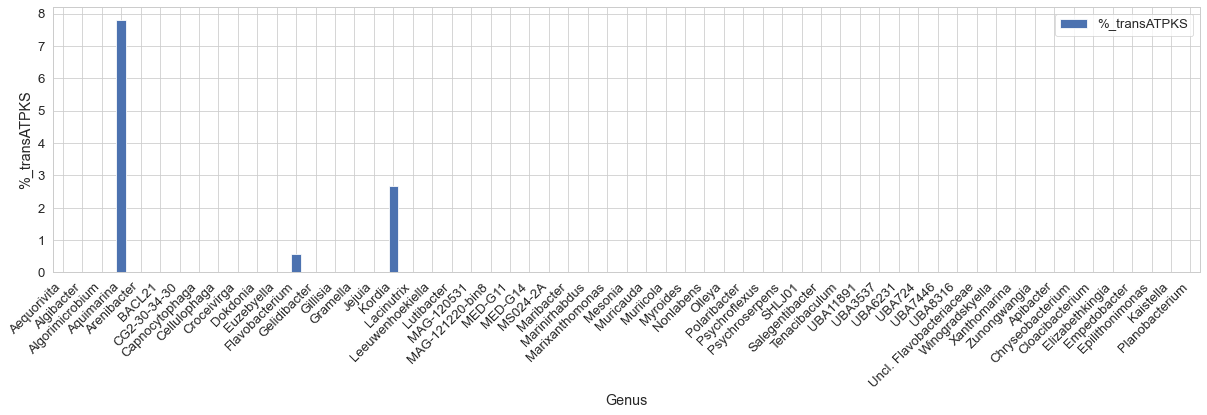

In [19]:
ax = df[["Genus", "%_transATPKS"]].plot(kind="bar", stacked=True, x="Genus", figsize=(17,6))

plt.ylabel('%_transATPKS')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Percentage_transATPKS.svg", dpi=300)

In [22]:
df.sort_values(by="%_transATPKS", ascending=False).head()

,Genus,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs,Completeness,Contamination,Strain_heterogeneity,Quality_score,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Contigs,Host taxid,Ncbi taxon ID,Plasmids,Refseq cds,Species taxid,%_transATPKS
3,Aquimarina,1.769231,0.564103,0.076923,0.948718,0.000000,0.923077,0.076923,1.564103,0.846154,2.000000,0.74359,9.512821,97.797692,1.061026,2.561795,92.492564,104.692308,107.589744,5.446682e+06,5.446091e+06,0.013923,16.230769,1.104849e+06,16.769231,1.097902e+06,50.128205,8.238592e+05,51.794872,8.214776e+05,1.433751e+06,1.392771e+06,19.897436,81.728692,0.329683,0.032005,4699.179487,3463.564103,1615.974359,2742.461538,109.076923,73.976603,34.756690,58.658220,2.314977,110.891892,0.0,1.493843e+06,0.0,4670.562500,1.439871e+06,7.816712
17,Kordia,4.250000,0.875000,0.000000,0.250000,0.000000,0.125000,0.000000,1.875000,0.000000,1.750000,0.25000,9.375000,99.128750,1.698750,0.328750,90.635000,46.875000,51.000000,5.023650e+06,5.021985e+06,0.033125,5.000000,2.215600e+06,5.375000,1.631689e+06,14.625000,2.058557e+06,16.625000,1.438530e+06,2.412356e+06,1.886955e+06,13.875000,95.573250,0.346299,0.025598,4375.875000,3002.750000,1394.875000,2337.500000,82.250000,68.817623,32.065035,53.630943,1.893958,50.333333,0.0,1.260455e+06,0.0,4478.750000,1.585181e+06,2.666667
12,Flavobacterium,0.312925,0.154762,0.008503,1.015306,0.003401,0.506803,0.013605,0.318027,0.318027,1.561224,0.02381,4.236395,97.831752,0.649184,6.980391,94.585833,89.506803,99.620748,3.807364e+06,3.804891e+06,0.064281,13.464286,8.281450e+05,14.829932,7.722044e+05,42.295918,6.281636e+05,46.641156,5.776452e+05,1.073943e+06,1.013301e+06,14.006803,81.244289,0.342528,0.032122,3327.469388,2588.955782,1288.471088,2086.452381,111.809524,78.117741,39.268772,63.067921,3.131370,98.193833,0.0,1.060999e+06,0.0,3306.309091,1.051291e+06,0.562023
0,Aequorivita,0.000000,0.000000,0.000000,1.023810,0.000000,0.904762,0.000000,0.000000,0.000000,1.023810,0.00000,2.952381,95.061429,0.841905,8.900238,90.851905,77.261905,185.571429,3.200450e+06,3.185949e+06,0.490238,14.095238,3.760242e+05,29.500000,3.460910e+05,43.214286,2.259482e+05,95.928571,2.152300e+05,5.943196e+05,5.507783e+05,13.523810,75.986500,0.382638,0.026743,2958.714286,2238.047619,1139.166667,1827.642857,53.309524,75.987128,38.569948,61.822365,1.796647,74.578947,0.0,1.604701e+06,0.0,2994.600000,1.603573e+06,0.000000
33,Nonlabens,0.178571,0.071429,0.000000,0.714286,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,2.964286,97.520357,0.506071,18.489643,94.990000,22.821429,25.000000,3.235067e+06,3.233720e+06,0.043357,3.214286,1.828661e+06,3.464286,1.662712e+06,9.357143,1.580274e+06,10.142857,1.504548e+06,2.044052e+06,1.891564e+06,5.571429,95.077179,0.366311,0.021626,3054.392857,2306.964286,1148.000000,1848.464286,75.000000,75.869864,37.812634,60.835904,2.484749,25.130435,0.0,9.328982e+05,2.0,2903.227273,1.024192e+06,0.000000


In [20]:
df_all = bgc_known_metadata.groupby(['Genus', "Family"]).mean()
df_all["%_transATPKS"]= df_all["transAT_PSK"]/df_all["Nr_BGCs"]*100
df_all = df_all.reset_index().set_index("Genus")
df_all = df_all.fillna(0)
df_all = df_all.sort_values(by=["Family", "Genus"])
df_all = df_all.drop(columns="Family")
df_all = df_all.reset_index()
df_all.head()

,Genus,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs,Completeness,Contamination,Strain_heterogeneity,Quality_score,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Contigs,Host taxid,Ncbi taxon ID,Plasmids,Refseq cds,Species taxid,%_transATPKS
0,AU392,0.000000,0.000000,0.0,0.00000,0.0,1.000000,0.0,0.0,0.0,1.00000,0.0,2.000000,99.100000,0.880000,0.000000,94.700000,6.500000,7.000000,3.336441e+06,3.335986e+06,0.013500,2.000000,1.980326e+06,2.000000,1.980326e+06,4.000000,1.734880e+06,4.000000,1.734880e+06,2.103742e+06,2.103742e+06,5.500000,99.884000,0.306165,0.021945,3038.000000,2443.500000,1243.500000,2007.000000,53.000000,80.431125,40.931509,66.063270,1.744574,6.500000,0.0,1.871037e+06,0.0,3015.50,2.273404e+06,0.0
1,Aequorivita,0.000000,0.000000,0.0,1.02381,0.0,0.904762,0.0,0.0,0.0,1.02381,0.0,2.952381,95.061429,0.841905,8.900238,90.851905,77.261905,185.571429,3.200450e+06,3.185949e+06,0.490238,14.095238,3.760242e+05,29.500000,3.460910e+05,43.214286,2.259482e+05,95.928571,2.152300e+05,5.943196e+05,5.507783e+05,13.523810,75.986500,0.382638,0.026743,2958.714286,2238.047619,1139.166667,1827.642857,53.309524,75.987128,38.569948,61.822365,1.796647,74.578947,0.0,1.604701e+06,0.0,2994.60,1.603573e+06,0.0
2,Algibacter,0.111111,0.666667,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,1.00000,0.0,1.777778,98.622222,1.021111,0.694444,93.516667,31.666667,32.555556,4.651915e+06,4.651624e+06,0.006000,4.000000,1.396200e+06,4.222222,1.316860e+06,10.888889,1.119576e+06,11.222222,1.119576e+06,1.782597e+06,1.695716e+06,12.777778,96.930778,0.331884,0.025124,4080.777778,3186.666667,1593.888889,2521.000000,178.888889,78.622646,39.321717,62.255655,4.441777,32.375000,0.0,1.415228e+06,0.0,4504.50,1.407220e+06,0.0
3,Algibacter_A,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,1.00000,0.0,1.000000,98.680000,0.530000,0.000000,96.030000,1.000000,1.000000,3.994770e+06,3.994770e+06,0.000000,1.000000,3.994770e+06,1.000000,3.994770e+06,1.000000,3.994770e+06,1.000000,3.994770e+06,3.994770e+06,3.994770e+06,1.000000,100.000000,0.318010,0.000000,3341.000000,2766.000000,1384.000000,2234.000000,194.000000,82.789584,41.424723,66.866208,5.806645,1.000000,0.0,1.736674e+06,0.0,3270.00,1.736674e+06,0.0
4,Algibacter_B,0.200000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,1.00000,0.0,1.200000,99.340000,0.598000,0.000000,96.350000,31.400000,34.400000,4.017717e+06,4.016293e+06,0.038200,2.800000,6.747382e+05,3.400000,4.538608e+05,9.200000,1.864088e+05,10.400000,1.572262e+05,1.192598e+06,9.958342e+05,11.600000,98.363000,0.331268,0.038608,3359.200000,2755.200000,1390.800000,2187.800000,168.000000,81.999214,41.440776,65.147998,4.933799,33.000000,0.0,1.547001e+06,0.0,3284.75,1.559281e+06,0.0


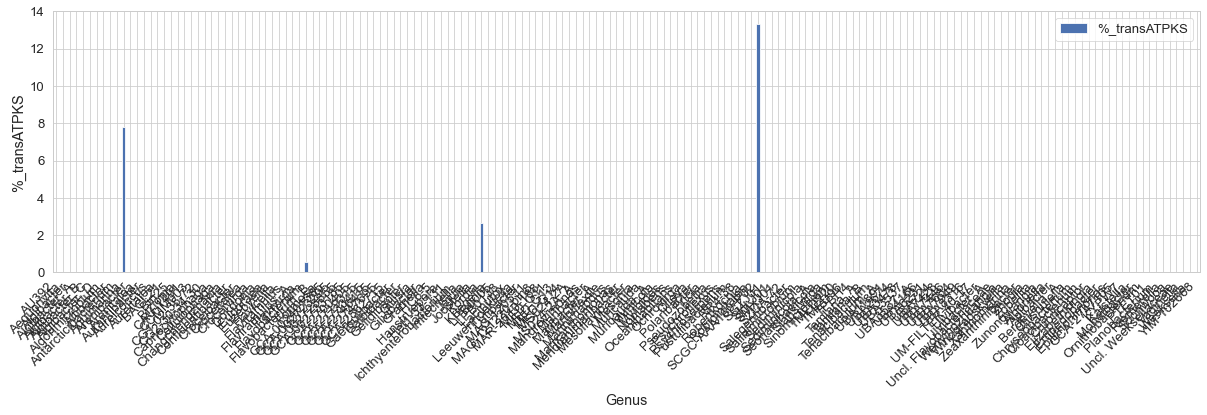

In [23]:
ax = df_all[["Genus", "%_transATPKS"]].plot(kind="bar", stacked=True, x="Genus", figsize=(17,6))

plt.ylabel('%_transATPKS')
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

ax.figure.savefig("Percentage_transATPKS_all.svg", dpi=300)

In [24]:
df_all.sort_values(by="%_transATPKS", ascending=False).head()

,Genus,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs,Completeness,Contamination,Strain_heterogeneity,Quality_score,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Contigs,Host taxid,Ncbi taxon ID,Plasmids,Refseq cds,Species taxid,%_transATPKS
104,SCGC-AAA160-P02,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.750000,0.000000,1.000000,0.50000,3.750000,87.560000,1.730000,20.880000,78.910000,195.000000,197.500000,3.036625e+06,3.036169e+06,0.017250,42.500000,1.112058e+06,43.250000,1.108716e+06,135.250000,1.084173e+06,137.000000,1.083923e+06,1.191343e+06,1.191317e+06,5.250000,46.291000,0.342555,0.017007,2961.750000,2058.750000,947.250000,1629.750000,43.750000,70.425802,33.504380,56.183928,1.549274,196.000000,0.0,1.655631e+06,0.0,3208.500000,1.655631e+06,13.333333
10,Aquimarina,1.769231,0.564103,0.076923,0.948718,0.000000,0.923077,0.076923,1.564103,0.846154,2.000000,0.74359,9.512821,97.797692,1.061026,2.561795,92.492564,104.692308,107.589744,5.446682e+06,5.446091e+06,0.013923,16.230769,1.104849e+06,16.769231,1.097902e+06,50.128205,8.238592e+05,51.794872,8.214776e+05,1.433751e+06,1.392771e+06,19.897436,81.728692,0.329683,0.032005,4699.179487,3463.564103,1615.974359,2742.461538,109.076923,73.976603,34.756690,58.658220,2.314977,110.891892,0.0,1.493843e+06,0.0,4670.562500,1.439871e+06,7.816712
63,Kordia,4.250000,0.875000,0.000000,0.250000,0.000000,0.125000,0.000000,1.875000,0.000000,1.750000,0.25000,9.375000,99.128750,1.698750,0.328750,90.635000,46.875000,51.000000,5.023650e+06,5.021985e+06,0.033125,5.000000,2.215600e+06,5.375000,1.631689e+06,14.625000,2.058557e+06,16.625000,1.438530e+06,2.412356e+06,1.886955e+06,13.875000,95.573250,0.346299,0.025598,4375.875000,3002.750000,1394.875000,2337.500000,82.250000,68.817623,32.065035,53.630943,1.893958,50.333333,0.0,1.260455e+06,0.0,4478.750000,1.585181e+06,2.666667
37,Flavobacterium,0.312925,0.154762,0.008503,1.015306,0.003401,0.506803,0.013605,0.318027,0.318027,1.561224,0.02381,4.236395,97.831752,0.649184,6.980391,94.585833,89.506803,99.620748,3.807364e+06,3.804891e+06,0.064281,13.464286,8.281450e+05,14.829932,7.722044e+05,42.295918,6.281636e+05,46.641156,5.776452e+05,1.073943e+06,1.013301e+06,14.006803,81.244289,0.342528,0.032122,3327.469388,2588.955782,1288.471088,2086.452381,111.809524,78.117741,39.268772,63.067921,3.131370,98.193833,0.0,1.060999e+06,0.0,3306.309091,1.051291e+06,0.562023
117,TMED96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,2.000000,90.256667,3.826667,55.846667,71.123333,72.000000,72.000000,1.673924e+06,1.668347e+06,0.315000,17.666667,4.295900e+04,17.666667,4.291467e+04,52.666667,1.530100e+04,52.333333,1.524867e+04,1.190573e+05,1.187590e+05,7.000000,36.333667,0.307077,0.020557,1567.666667,1288.666667,741.333333,1096.000000,32.333333,82.466596,47.513825,70.158510,2.066420,57.333333,0.0,1.959719e+06,0.0,1392.666667,1.959719e+06,0.000000
